In [ ]:
#Start all notebooks with this line.  It sets a lot of variables to values we want to use,
#and reads in some important packages of routines, too.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## The Rossiter-McLaughlin effect

In this problem, we will create a simple numerical model to create curves of radial velocity vs. time showing the Rossiter-McLaughlin effect.   We'll make a few simplifying assumptions: 

- (1) Assume the star's equator is exactly edge-on (or its rotation axis is exactly perpendicular to the observer)

- (2) Assume all parts of the star's surface rotate at the same rate 

- (3) Assume the star is a perfectly uniform surface (no limb darkening).  Let's also assume the star has a radius $R_\odot$ and has the same period of rotation as the sun, the planet has a radius $R_\odot/10$, and that the planet speed is such that, if it transits the star at its equator, the center of the planet takes takes 2 hours to travel across the star.  

In this problem, I'll walk you through the process I used to model this system.   However, before reading through my process, and before each step, I would encourage you to think about how you might have designed this algorithm for yourself.  In addition, I make no guarantees that I found the best or most efficient way to complete this problem.  I would encourage you to think creatively and critically about the modeling steps.


### 1(a): First, let's do some geometry to figure out the radial velocity at each point on the star.  Firstly, consider a particle traveling in a circle with speed $v$, and radius $r$, viewed edge-on by an observer.  When the particle is at the edge of the circle (from the observer's perspective) it has a maximum radial velocity.  When the particle is at the center of the circle, it has zero radial velocity (all of its motion is tangential to the observer).  Find an expression for the radial velocity, $v_r$, as a function $x$ --- the observed separation of the particle from the center of the circle, as well as $v$ and $r$.

The radial velocity based on x is
$$ v_r = Vcos(\theta)$$
where $\theta$ is the angle of the direction of the radial velocity that is captured by the observer. This is equal to the ratio of x, that is the distance from the axis of rotation to the radius, which would become
$$ V_r = V \frac x r$$

### 1(b): Now, we need to consider the fact that the speed of a particle on the surface of a star depends on its distance from the rotation axis.  (Since all of the molecules on the surface of the star have the same angular speed, $\omega$, the molecules near the pole must have a different speed than the molecules near the equator.)  Find an expression for the velocity of a particle as a function of the radius of the circle along which it travels, $r$, and its angular speed, $\omega$.  

The speed of a particle in respect to $\omega$ is
$$ V_{particle} = r \omega$$

### 1(c): Combine the last two equations to find an equation for radial velocity, $v_r$, as a function of $x$ and $\omega$.  We now know how to find the radial velocity at any point on a rotating star.  

Substituting V from 1a) for $V_{particle}$, $V_r$ becomes
$$V_r =\omega x \frac r r$$
$$V_r =\omega x$$

### 1(d): Now let's begin the modeling process.  Create a 2-dimensional 500 x 500 pixel grid of physical size 2$R_\odot$ x 2$R_\odot$, with positions going from -$R_\odot$ to +$R_\odot$.  Hint: Use the numpy.linspace routine to define the x and y coordinates of your axes.  Then, use numpy.meshgrid to find the x and y positions at every point on the 500 x 500 pixel grid.  Use the radial velocity expression you derived to also create a grid of radial velocity values.

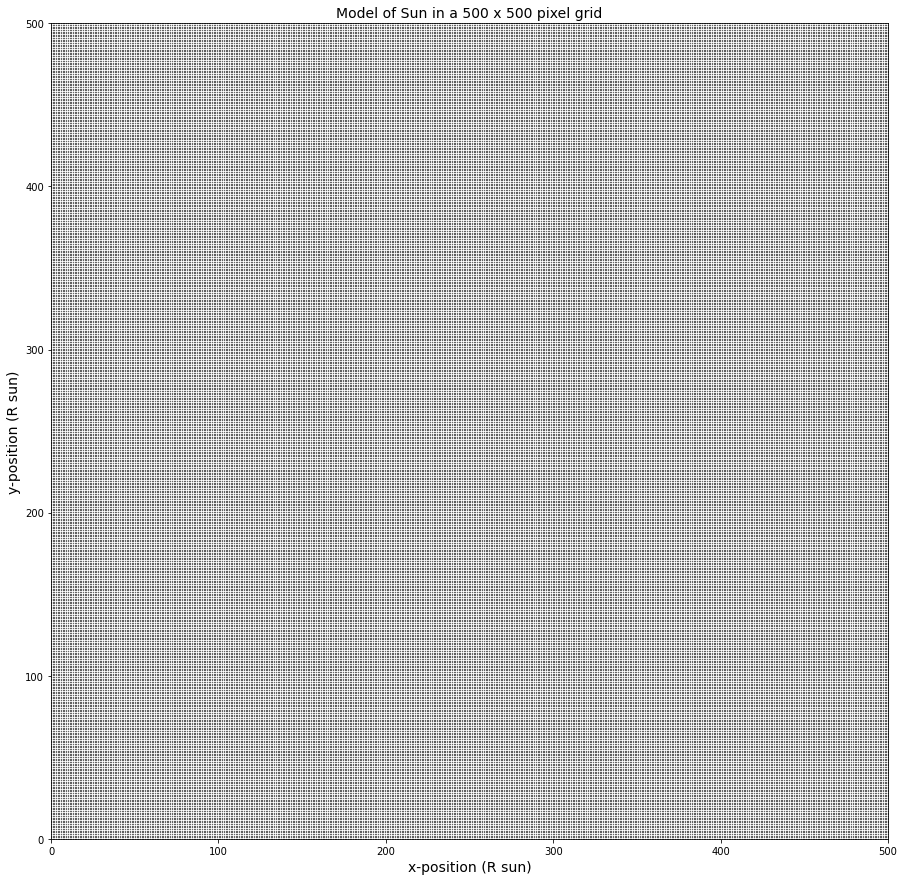

In [ ]:
fig= plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
a = np.linspace(0, 500, num=500)
b = np.linspace(0, 500, num=500)##creating a grid 500*500 pixels

xa, xb = np.meshgrid(a, b)

ax.set_xlim(0, 500)
ax.set_ylim(0, 500)

ax.set_xlabel("x-position (R sun)", fontsize=14)
ax.set_ylabel("y-position (R sun)", fontsize=14)
ax.set_title("Model of Sun in a 500 x 500 pixel grid", fontsize=14)

ax.plot(xa, xb, '.', color = "black", markersize = 0.5)


### 1(e): Create a mask to represent the star's boundaries.  Create a boolean array with the value of True wherever the grid points are inside the star's radius, and the value False wherever the grid points are outside of the star's radius.

Text(0.5, 1.0, 'Model of Sun in a 500 x 500 pixel grid')

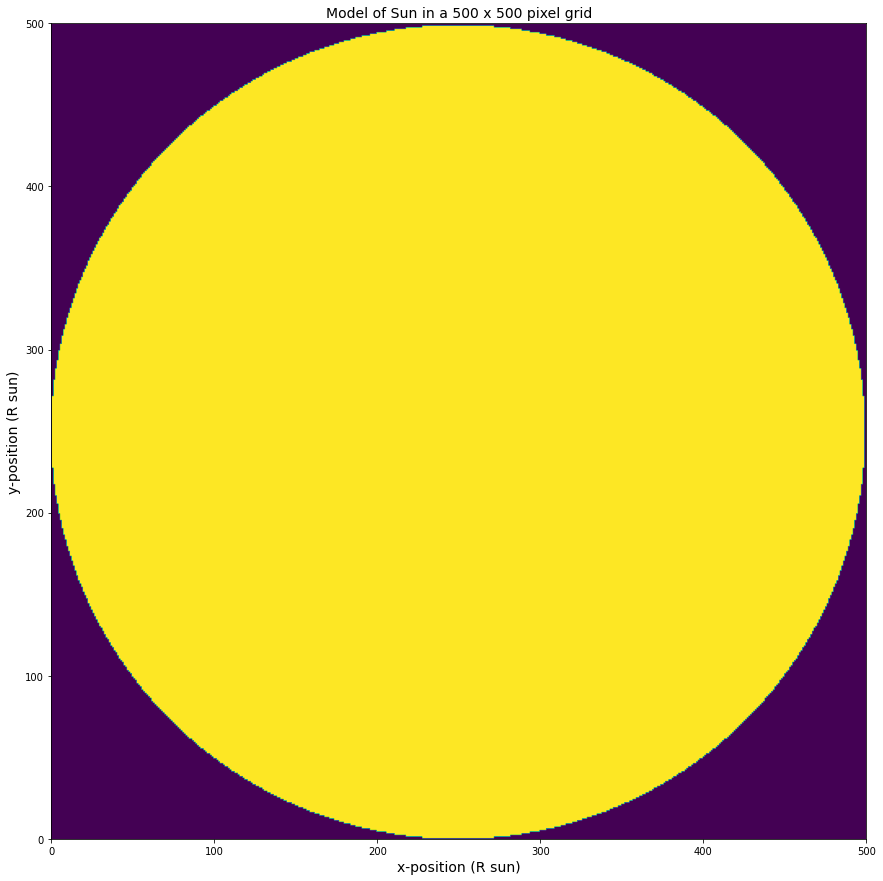

In [ ]:
fig= plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-1, 1, num=500)
xa, xb = np.meshgrid(a, b)

def distance (x, y):
  return ((x**2 + y**2)**0.5)

star_mask = (distance(xa, xb) < 1)##star mask with radius 1 (solar radii)
ax.imshow(star_mask)

ax.set_xlim(0, 500)
ax.set_ylim(0,500)

ax.set_xlabel("x-position (R sun)", fontsize=14)
ax.set_ylabel("y-position (R sun)", fontsize=14)
ax.set_title("Model of Sun in a 500 x 500 pixel grid", fontsize=14)

##ax.plot(xa, xb, '.', color = "black")


### 1(f): Given an (x,y) position for the planet, and given its radius $R_\odot/10$, create a mask to represent the planet's boundaries.  Create a boolean array with the value of True wherever the grid points are inside the planet's radius, and the value False wherever the grid points are outside of the planet's radius.

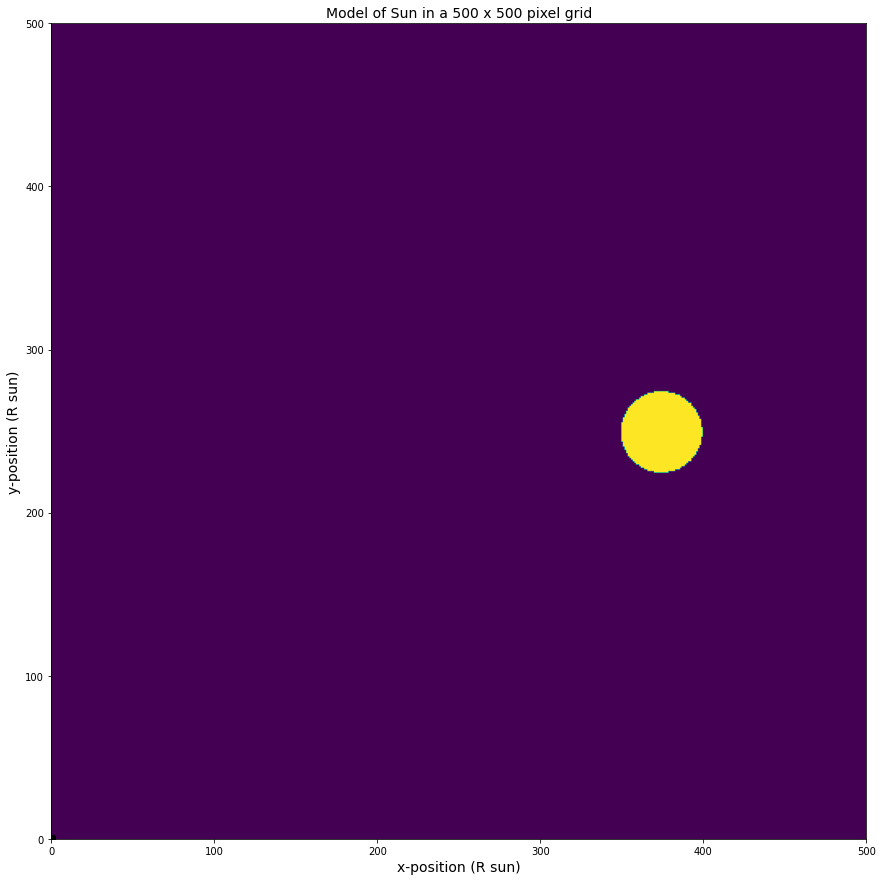

In [ ]:
fig= plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-0.1, 0.1, num=50)
xa, xb = np.meshgrid(a, a)
xc, xd = np.meshgrid(b, b)

rsun = 6.96 *10**8
omega = 2*pi/rsun
v = omega*xa

def distance (x, y, x0, y0):
  return (((x0-x)**2 + (y0-y)**2)**0.5)

star_mask = (distance(xa, xb, 0, 0) < 1)
pl_mask = (distance(xa, xb, 0.5, 0) < 0.1) ##a planet at 0.5 sun radii in the x-direction
ax.imshow(star_mask, cmap = ('Purples'))
ax.imshow(pl_mask) ##creating the planet with 1/10 of the star's radius, only showing the planet because both can't be shown at the same time

ax.set_xlim(0, 500)
ax.set_ylim(0,500)

ax.set_xlabel("x-position (R sun)", fontsize=14)
ax.set_ylabel("y-position (R sun)", fontsize=14)
ax.set_title("Model of Sun in a 500 x 500 pixel grid", fontsize=14)

ax.plot(xa, xb, '.', color = "black")

### 1(g): Create an array of times extending from 1 hour before ingress and extending to 1 hour after egress (4 hours in total).  

In [ ]:
time = np.linspace(-7200, 7200, num=14400) #created 4 hours of time in seconds


print(time)

[-7200.         -7198.99993055 -7197.9998611  ...  7197.9998611
  7198.99993055  7200.        ]


<font color="red">*Comments from instructor:*</font> 

### 1(h):  Let's begin with a simple example of a planet transiting the stellar equator.  For each time in the time grid, compute the x and y position of the planet.  Then, use the star and planet boolean masks to compute the mean radial velocity of the observable parts of the star.  Make a plot of the radial velocity vs. time.  Make sure the properties of this plot match your expectations.  If not, figure out why and fix it.

[-2.00013889 -1.99986109 -1.99958329 ...  1.99930552  1.99958331
  1.99986111]


Text(0.5, 1.0, 'Apparent radial velocity of the Sun due to planet transit at equator')

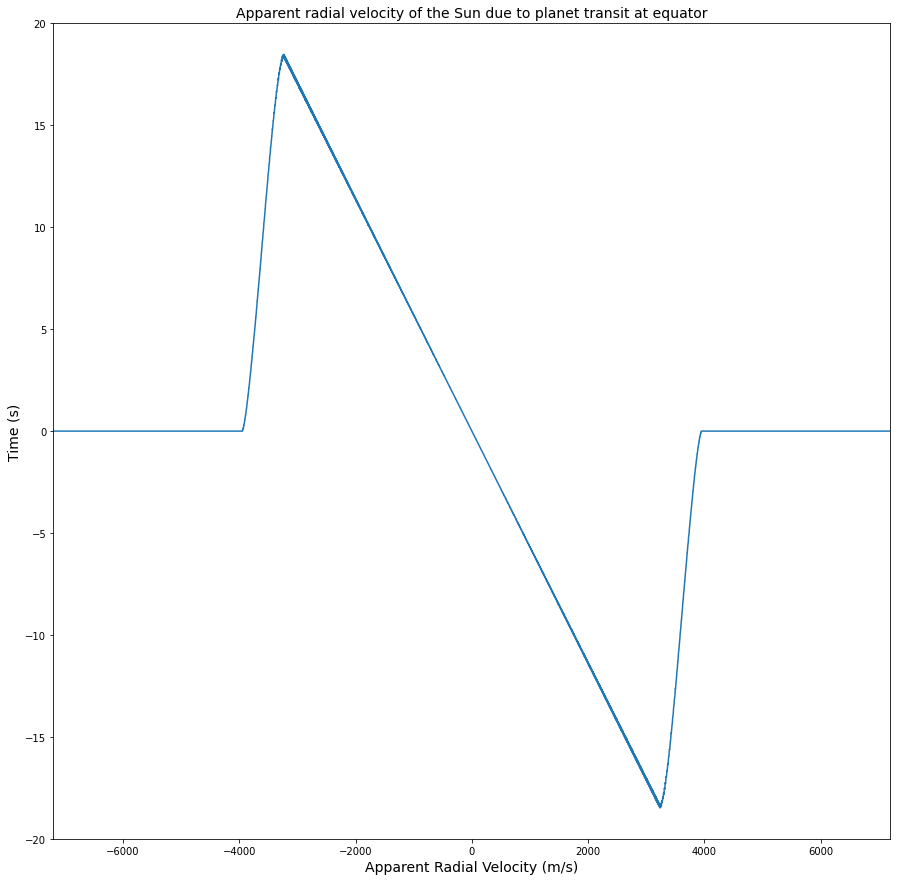

In [ ]:
fig= plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-0.1, 0.1, num=50)
xa, xb = np.meshgrid(a, a)
xc, xd = np.meshgrid(b, b)

period = 25*24*3600  ##period of the sun's rotation, which is 25 days, converted to seconds
rsun = 6.96 *10**8  #radius of the sun, in meters
omega = 2*pi /period
v = omega*xa*rsun  #velocity is the position from the axis, which is xa times radius of the sun, times angular velocity

v_times = np.zeros(np.size(time)) ##creating an array of length of the time array
position = (time * 4 -2)/14400 ##creating position as a function of time
star_mask = (distance(xa, xb, 0, 0) < 1)

def distance (x, y, x0, y0):
  return (((x0-x)**2 + (y0-y)**2)**0.5)

for i, k in enumerate(v_times):
  pl_mask = (distance(xa, xb, position[i], 0) < 0.1) ##planet mask is created compared to time
  comb = ((pl_mask == False) & (star_mask == True))  ##returns true only if the star mask is in it, not the planet mask
  v_times[i] = np.mean(v[comb])

ax1.plot(time, v_times)

ax1.set_xlim(-7200, 7200)
ax1.set_ylim(-20, 20)

ax1.set_xlabel("Apparent Radial Velocity (m/s)", fontsize=14)
ax1.set_ylabel("Time (s)", fontsize=14)
ax1.set_title("Apparent radial velocity of the Sun due to planet transit at equator", fontsize=14)

The plot matches my expectations. When the planet start to transit in, it covers up the part of the star that is rotating away from Earth, which is why it appears to have a positive radial velocity. When it goes past the center, the radial velocity becomes negaitve because the planet is covering up the part of the star that has a positive radial velocity.

### 1(i): Try another example in which the planet travels straight across the star, but at a height $R_\odot/2$ above the star's equator.  Plot both this and the previous example on the same plot, and make sure their similarities/differences match your expectations as well.

[-2.00013889 -1.99986109 -1.99958329 ...  1.99930552  1.99958331
  1.99986111]


Text(0.5, 1.0, 'Apparent radial velocity of the Star')

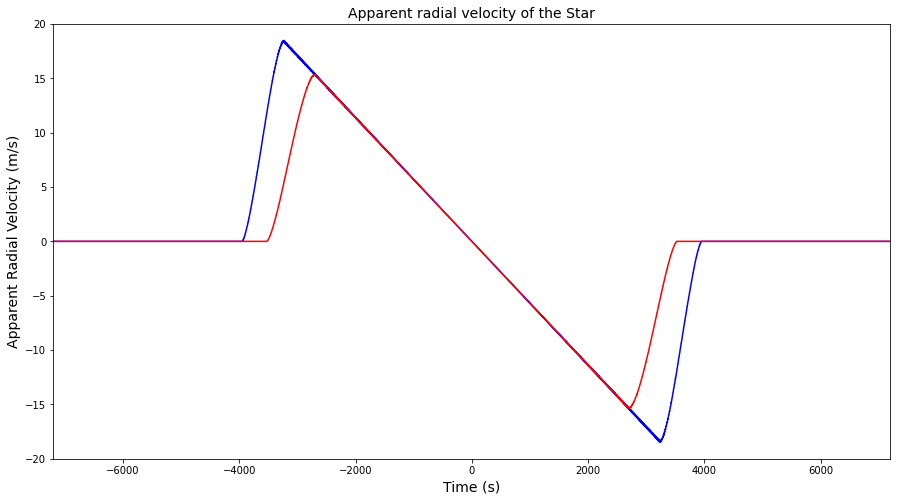

In [ ]:
fig= plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-0.1, 0.1, num=50)
xa, xb = np.meshgrid(a, a)
xc, xd = np.meshgrid(b, b)

period = 25*24*3600
rsun = 6.96 *10**8
omega = 2*pi /period
v = omega*xa*rsun

position = (time * 4 -2)/14400
print(position)
star_mask = (distance(xa, xb, 0, 0) < 1)

def distance (x, y, x0, y0):
  return (((x0-x)**2 + (y0-y)**2)**0.5)

def plot (y_pos):  ##created a function that creates the graph based on the y-position
  v_times = np.zeros(np.size(time))
  for i, k in enumerate(v_times):
    pl_mask = (distance(xa, xb, position[i], y_pos) < 0.1)
    comb = ((pl_mask == False) & (star_mask == True))
    v_times[i] = np.mean(v[comb])
  return (v_times)

v1 = plot(0)
ax1.plot(time, v1, color = "blue", label = 'Planet at equator')
v2 = plot(0.5)
ax1.plot(time, v2, color = "red", label = 'Planet at 45°')

ax1.set_xlim(-7200, 7200)
ax1.set_ylim(-20, 20)

ax1.set_xlabel("Time (s)", fontsize=14)
ax1.set_ylabel("Apparent Radial Velocity (m/s)", fontsize=14)
ax1.set_title("Apparent radial velocity of the Star", fontsize=14)

The radial velocity graphs makes sense because the planet that is between the equator and the pole is seeing a dip in radial velocity later at the start and earlier when transitting out. This is due to the star having covered less horizontally at higher lattitudes. 

### 1(j): Try another example in which the planet travels vertically across the surface of the star, but offset from the star's rotation axis by a distance $R_\odot/2$.  Plot all three curves on the same plot, and make sure this last plot matches your expectations. 

Text(0.5, 1.0, 'Apparent radial velocity of the Star')

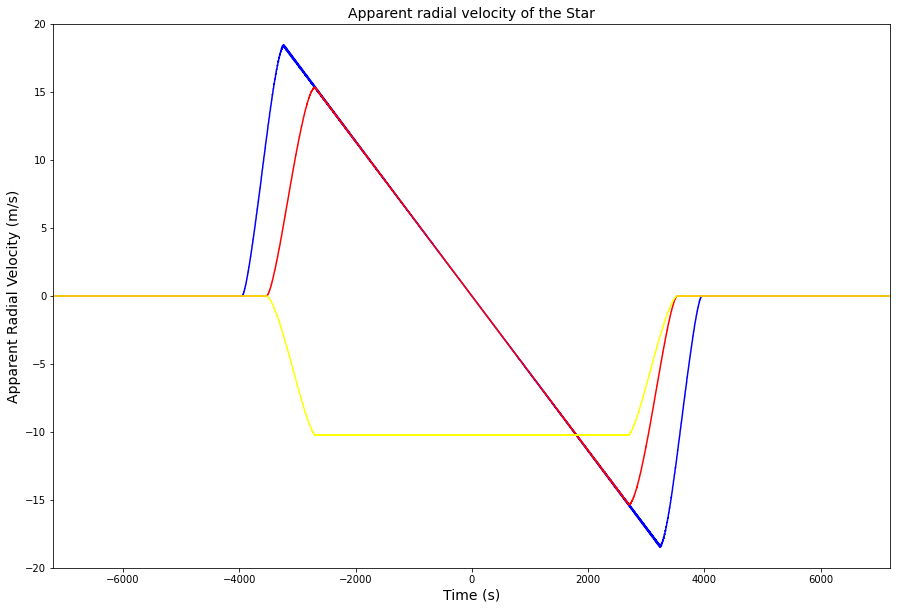

In [ ]:
fig= plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-0.1, 0.1, num=50)
xa, xb = np.meshgrid(a, a)
xc, xd = np.meshgrid(b, b)

period = 25*24*3600
rsun = 6.96 *10**8
omega = 2*pi /period
v = omega*xa*rsun

position = (time * 4 -2)/14400
star_mask = (distance(xa, xb, 0, 0) < 1)

def distance (x, y, x0, y0):
  return (((x0-x)**2 + (y0-y)**2)**0.5)

def plot (pos, angle): ##added the angle, relative horizontally if angle is not 90 degrees relative horizontally
  v_times = np.zeros(np.size(time))
  if (angle == pi/2):     ##if angle is 90 degrees relative horizontally then the position is for the x value
    for i, k in enumerate(v_times):
      xp = pos
      yp = position[i]
      pl_mask = (distance(xa, xb, xp, yp) < 0.1)
      comb = ((pl_mask == False) & (star_mask == True))
      v_times[i] = np.mean(v[comb])
  else:
    for i, k in enumerate(v_times):
      xp = cos(angle) * position[i]
      yp = sin(angle) * position[i] + pos
      pl_mask = (distance(xa, xb, xp, yp) < 0.1)
      comb = ((pl_mask == False) & (star_mask == True))
      v_times[i] = np.mean(v[comb])
  return (v_times)

v1 = plot(0, 0)
ax1.plot(time, v1, label = 'Planet at equator', color = "blue")
v2 = plot(0.5, 0)
ax1.plot(time, v2, label = 'Planet at 45°', color = "red")
v3 = plot(0.5, pi/2)
ax1.plot(time, v3, label = 'Planet at 45°, travelling vertically', color = "yellow")

ax1.set_xlim(-7200, 7200)
ax1.set_ylim(-20, 20)

ax1.set_xlabel("Time (s)", fontsize=14)
ax1.set_ylabel("Apparent Radial Velocity (m/s)", fontsize=14)
ax1.set_title("Apparent radial velocity of the Star", fontsize=14)

The plot makes sense because the planet in case 3 is blocking the right side of the star, which has a positive radial velocity, so the net radial velocity is negative. In case 3 the radial velocity begins to change at the same point case 2 does as well, which makes sense because they are both transiting around half the radius of the star from the center.

### 1(k):  Now let's increase the complication somewhat.  Consider a planet that passes across a star such that its path makes an angle $\theta$ with the star's equator, and that its path intersects the equator at a distance from the star's rotation axis of $\Delta x$.  Find expressions for the planet's x and y position as a function of $\theta$, $\Delta x$, and its position along its path which we'll call $x'$.  Given that $x'=v_\mathrm{planet} \times \mathrm{time}$, compute the x and y position of the planet as a function of time.

I have defined the function on the last problem

### 1(l): Use the computed x and y positions to find the radial velocity curve for a planet with $\theta=45^\circ$ and $\Delta x=R_\odot/2$.  Plot all 4 model tests on the same plot.  Include a legend identifying the curves, proper axes labels, etc.

Text(0.5, 1.0, 'Apparent radial velocity of the Star')

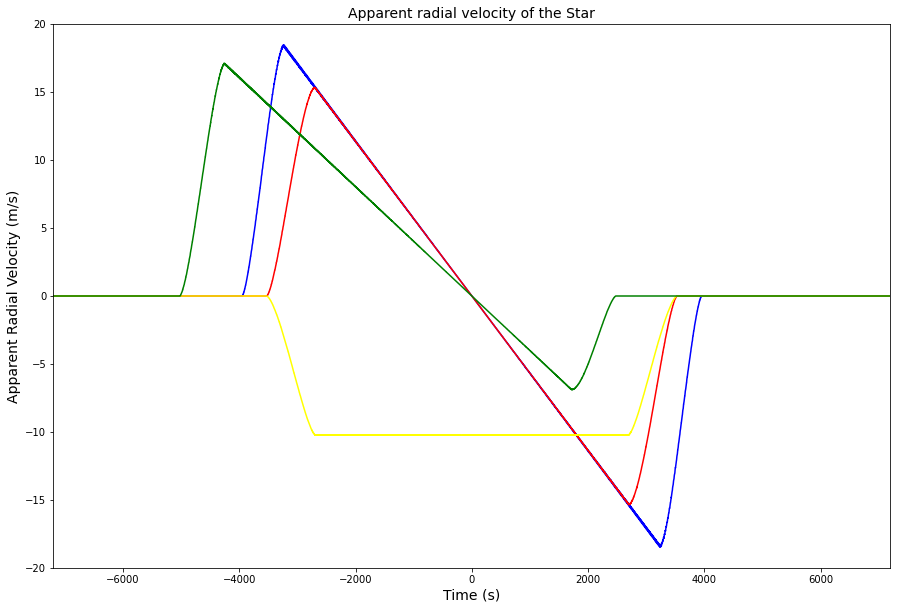

In [ ]:
fig= plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-0.1, 0.1, num=50)
xa, xb = np.meshgrid(a, a)
xc, xd = np.meshgrid(b, b)

period = 25*24*3600
rsun = 6.96 *10**8
omega = 2*pi /period
v = omega*xa*rsun

position = (time * 4 -2)/14400
star_mask = (distance(xa, xb, 0, 0) < 1)

def distance (x, y, x0, y0):
  return (((x0-x)**2 + (y0-y)**2)**0.5)

def plot (pos, angle): ##added the angle, relative horizontally if angle is not 90 degrees relative horizontally
  v_times = np.zeros(np.size(time))
  if (angle == pi/2):     ##if angle is 90 degrees relative horizontally then the position is for the x value
    for i, k in enumerate(v_times):
      xp = pos
      yp = position[i]
      pl_mask = (distance(xa, xb, xp, yp) < 0.1)
      comb = ((pl_mask == False) & (star_mask == True))
      v_times[i] = np.mean(v[comb])
  else:
    for i, k in enumerate(v_times):
      xp = cos(angle) * position[i]
      yp = sin(angle) * position[i] + pos
      pl_mask = (distance(xa, xb, xp, yp) < 0.1)
      comb = ((pl_mask == False) & (star_mask == True))
      v_times[i] = np.mean(v[comb])
  return (v_times)

v1 = plot(0, 0)
ax1.plot(time, v1, label='Planet at equator', color = "blue") ##I'm not sure why the labels aren't showing up to the graph
v2 = plot(0.5, 0)
ax1.plot(time, v2, label = 'Planet between equator and the north pole', color = "red")
v3 = plot(0.5, pi/2)
ax1.plot(time, v3, label = 'Planet between the axis of rotation and the edge, travelling vertically', color = "yellow")
v4 = plot(0.5, pi/4) ##45 degrees
ax1.plot(time, v4, label = 'Planet between equator and the north pole, travelling at 45°', color = "green") 

ax1.set_xlim(-7200, 7200)
ax1.set_ylim(-20, 20)

ax1.set_xlabel("Time (s)", fontsize=14)
ax1.set_ylabel("Apparent Radial Velocity (m/s)", fontsize=14)
ax1.set_title("Apparent radial velocity of the Star", fontsize=14)

### 1(m): Perform at least one additional test and/or improvement to this modeling procedure, of your choosing.  Describe what you're doing and why.  

Test 1: planet transits through the north pole of the star, with only half of the planet covering the star at its max. I expect the transit to start late and end early, with little change in radial velocity.

Text(0.5, 1.0, 'Apparent radial velocity of the Star')

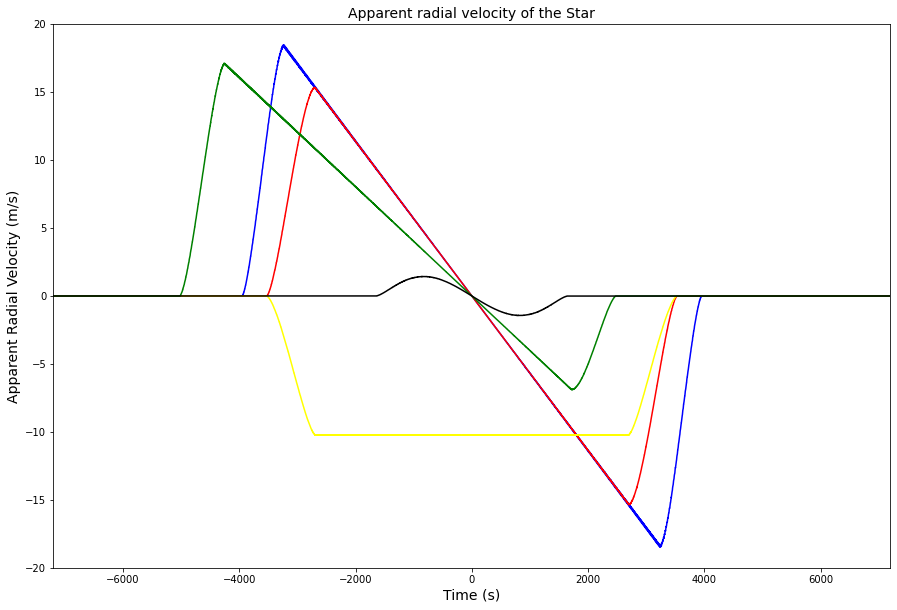

In [ ]:
fig= plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

a = np.linspace(-1, 1, num=500)
b = np.linspace(-0.1, 0.1, num=50)
xa, xb = np.meshgrid(a, a)
xc, xd = np.meshgrid(b, b)

period = 25*24*3600
rsun = 6.96 *10**8
omega = 2*pi /period
v = omega*xa*rsun

position = (time * 4 -2)/14400
star_mask = (distance(xa, xb, 0, 0) < 1)

def distance (x, y, x0, y0):
  return (((x0-x)**2 + (y0-y)**2)**0.5)

def plot (pos, angle): ##added the angle, relative horizontally if angle is not 90 degrees relative horizontally
  v_times = np.zeros(np.size(time))
  if (angle == pi/2):     ##if angle is 90 degrees relative horizontally then the position is for the x value
    for i, k in enumerate(v_times):
      xp = pos
      yp = position[i]
      pl_mask = (distance(xa, xb, xp, yp) < 0.1)
      comb = ((pl_mask == False) & (star_mask == True))
      v_times[i] = np.mean(v[comb])
  else:
    for i, k in enumerate(v_times):
      xp = cos(angle) * position[i]
      yp = sin(angle) * position[i] + pos
      pl_mask = (distance(xa, xb, xp, yp) < 0.1)
      comb = ((pl_mask == False) & (star_mask == True))
      v_times[i] = np.mean(v[comb])
  return (v_times)

v1 = plot(0, 0)
ax1.plot(time, v1, label = 'Planet at equator', color = "blue") ##I'm not sure why the labels aren't showing up to the graph
v2 = plot(0.5, 0)
ax1.plot(time, v2, label = 'Planet between equator and the north pole', color = "red")
v3 = plot(0.5, pi/2)
ax1.plot(time, v3, label = 'Planet between the axis of rotation and the edge, travelling vertically', color = "yellow")
v4 = plot(0.5, pi/4) ##45 degrees
ax1.plot(time, v4, label = 'Planet between equator and the north pole, travelling at 45°', color = "green") 
v2 = plot(1, 0)
ax1.plot(time, v2, label = 'Planet transiting at the pole', color = "black")

ax1.set_xlim(-7200, 7200)
ax1.set_ylim(-20, 20)

ax1.set_xlabel("Time (s)", fontsize=14)
ax1.set_ylabel("Apparent Radial Velocity (m/s)", fontsize=14)
ax1.set_title("Apparent radial velocity of the Star", fontsize=14)